# IMPORTS/DATA 
CLEANED AND SCRAPED IN WORKBOOK

In [5]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from fbprophet import Prophet as proph
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

In [6]:
dfworking = pd.read_csv("DATAFRAME_CLEANED_ALL_CALLS_org.csv") 
dfborough= pd.read_csv('DATAFRAME_CLEANED_ALL_CALLS_BOROUGH.csv')
dfborough= dfborough.drop('Unnamed: 0', axis = 1)
QUEENS = pd.read_csv('QUEENS_FINAL.csv')
BROOKLYN = pd.read_csv("BROOKLYN_FINAL.csv")
MANHATTAN = pd.read_csv('MANHATTAN_FINAL.csv')
STATEN_ISLAND = pd.read_csv('STATEN_ISLAND_FINAL.csv')
BRONX = pd.read_csv('BRONX_FINAL.csv')

# EDA

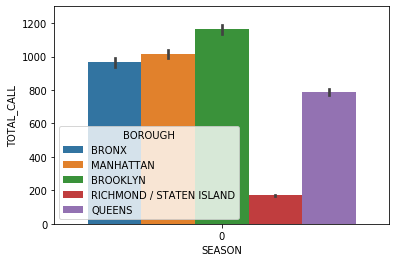

In [7]:
# Population per borough estimate 2018 census
Bronx_pop = 1432132
Brooklyn_pop = 2582830
Manhattan_pop = 1628701
Queens_pop = 2278906
Staten_Island_pop= 476179

# Distobution of calls per Borough
sns.barplot(ax = sns.barplot(x="SEASON", y="TOTAL_CALL", hue= 'BOROUGH', data=dfborough))

NameError: name 'ax' is not defined

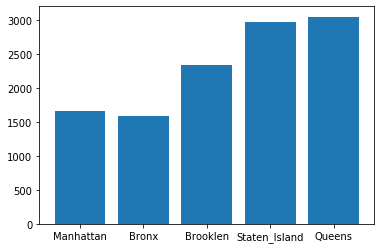

In [11]:
Man_Call_Per= Manhattan_pop/MANHATTAN.TOTAL_CALL.mean()
Bronx_Call_Per = Bronx_pop/BRONX.TOTAL_CALL.mean()
Brooklen_Call_Per = Brooklyn_pop/BROOKLYN.TOTAL_CALL.mean()
Staten_Island_Call_Per = Staten_Island_pop/STATEN_ISLAND.TOTAL_CALL.mean()
Queens_Call_Per = Queens_pop/QUEENS.TOTAL_CALL.mean()


#Average Call Per Population of Borough
list_call_per = [Man_Call_Per, Bronx_Call_Per, Brooklen_Call_Per, Staten_Island_Call_Per, Queens_Call_Per]
plt.bar(["Manhattan", "Bronx", "Brooklen", "Staten_Island", "Queens"], list_call_per)
plt.show(ax)

#### T-Test to check importance of Precipitation to calls

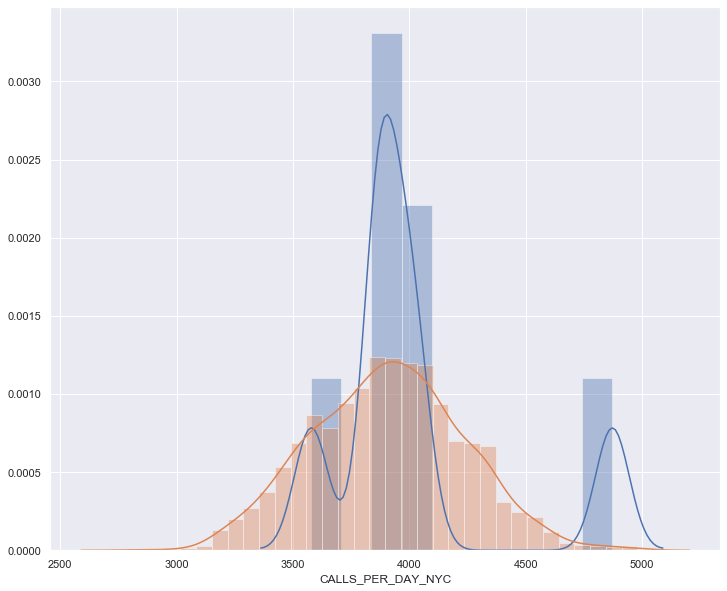

In [12]:
#creating 2 sample groups
waterless2inch = dfworking[dfworking['PRECIPITATION_INCHES'] <= 2]
water2inch = dfworking[dfworking['PRECIPITATION_INCHES'] > 2]

#plotting in Seaborn
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(water2inch["CALLS_PER_DAY_NYC"])
sns.distplot(waterless2inch["CALLS_PER_DAY_NYC"]) 


In [13]:
#Appears to be an average of of 2.5% more calls on days with rain.
experimental = water2inch["CALLS_PER_DAY_NYC"]
control = waterless2inch["CALLS_PER_DAY_NYC"]
control.mean()
experimental.mean()
experimental.mean() - control.mean()

106.69374104156714

In [14]:
#Results show no signifigant difference between there being 2 inches of rain and the number of ambulance calls.
stats.ttest_ind(experimental, control)

Ttest_indResult(statistic=0.8654095204543684, pvalue=0.3869130024990134)

#### T-Test to check the importance of Holidays in regards to Ambulance calls

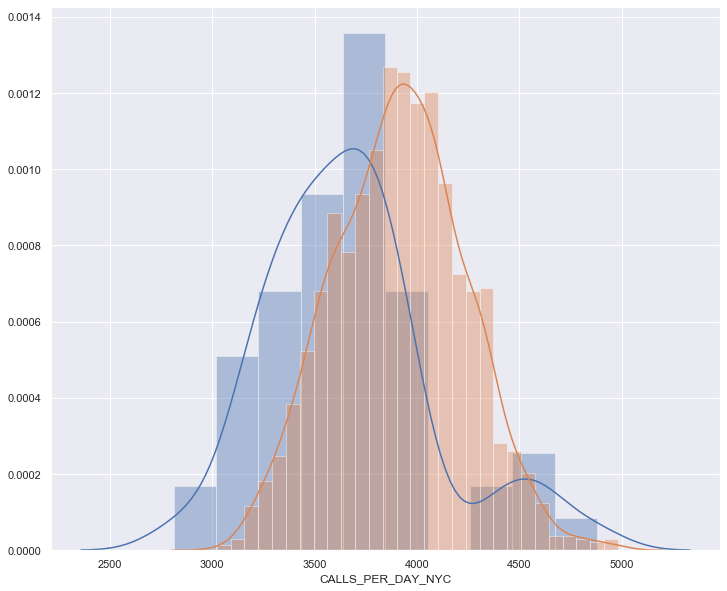

In [15]:
Holiday = dfworking[dfworking["HOLIDAY"] == True]
NotHoliday= dfworking[dfworking["HOLIDAY"] == False]
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(Holiday["CALLS_PER_DAY_NYC"])#Blue
sns.distplot(NotHoliday["CALLS_PER_DAY_NYC"]) #Orange

In [16]:
#Appears average of 250 less calls on holidays
experimental1 = Holiday["CALLS_PER_DAY_NYC"]
control1 = NotHoliday["CALLS_PER_DAY_NYC"]
control1.mean()
experimental1.mean()
experimental1.mean() - control1.mean()

-247.63402632867064

In [17]:
#Null is rejected there is a statistical difference between calls on holidays and not holidays. Less on holidays.
stats.ttest_ind(experimental, control)

Ttest_indResult(statistic=0.8654095204543684, pvalue=0.3869130024990134)

#### ANOVA Test on Day's of The Week

Text(0, 0.5, 'Calls')

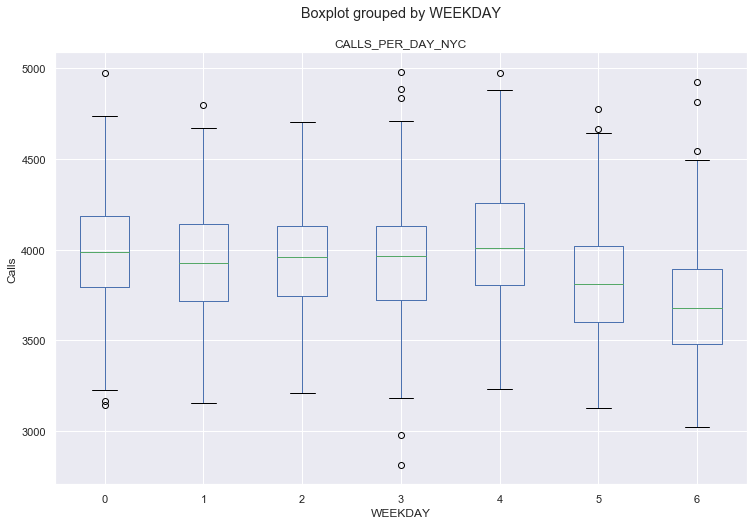

In [18]:
dfworking.boxplot("CALLS_PER_DAY_NYC", by= "WEEKDAY", figsize= (12,8))
plt.ylabel('Calls')

In [19]:
lm = ols('CALLS_PER_DAY_NYC ~ WEEKDAY', dfworking).fit()
lm.summary()

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      CALLS_PER_DAY_NYC   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     99.87
Date:                Tue, 21 Jan 2020   Prob (F-statistic):           5.26e-23
Time:                        14:17:16   Log-Likelihood:                -15080.
No. Observations:                2100   AIC:                         3.016e+04
Df Residuals:                    2098   BIC:                         3.018e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4011.7617     12.495    321.065      0.000    3987.257    4036.266
WEEKDAY      -34.6487      3.467     -9.994      0.000     -41.448     -27.849
==============================================================================
Omnibus:                        6.516   Durbin-Watson:                   0.628
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                6.500
Skew:                           0.136   Prob(JB):                       0.0388
Kurtosis:                       3.015   Cond. No.                         6.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### ANOVA Test on Seasons

Text(0, 0.5, 'Calls')

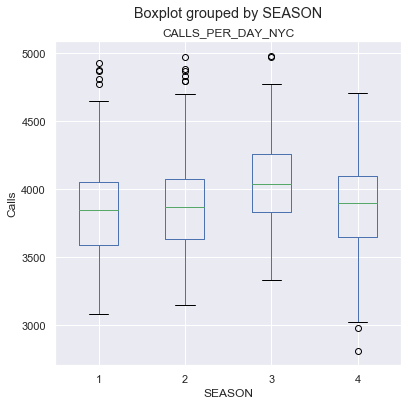

In [20]:
dfworking.boxplot("CALLS_PER_DAY_NYC", by= "SEASON", figsize= (6,6))
plt.ylabel('Calls')

In [21]:
lm = ols('CALLS_PER_DAY_NYC ~ SEASON', dfworking).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      CALLS_PER_DAY_NYC   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     24.43
Date:                Tue, 21 Jan 2020   Prob (F-statistic):           8.32e-07
Time:                        14:17:17   Log-Likelihood:                -15117.
No. Observations:                2100   AIC:                         3.024e+04
Df Residuals:                    2098   BIC:                         3.025e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3829.0032     17.465    219.235      0.000    3794.752    3863.254
SEASON        31.3746      6.348      4.943      0.000      18.926      43.823
==============================================================================
Omnibus:                        3.440   Durbin-Watson:                   0.737
Prob(Omnibus):                  0.179   Jarque-Bera (JB):                3.498
Skew:                           0.094   Prob(JB):                        0.174
Kurtosis:                       2.930   Cond. No.                         7.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### ANOVA ON TEMPERATURE

In [22]:
lm = ols('CALLS_PER_DAY_NYC ~ TEMP_MAX_F', dfworking).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      CALLS_PER_DAY_NYC   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     493.6
Date:                Tue, 21 Jan 2020   Prob (F-statistic):           2.19e-98
Time:                        14:17:17   Log-Likelihood:                -14907.
No. Observations:                2100   AIC:                         2.982e+04
Df Residuals:                    2098   BIC:                         2.983e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3423.7245     22.714    150.734      0.000    3379.181    3468.268
TEMP_MAX_F     7.6708      0.345     22.217      0.000       6.994       8.348
==============================================================================
Omnibus:                       22.771   Durbin-Watson:                   0.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.305
Skew:                           0.244   Prob(JB):                     8.70e-06
Kurtosis:                       3.165   Cond. No.                         234.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Corrolation plot to explore feature importance.


In [23]:
corr = dfworking.corr()
corr.style.background_gradient(cmap='coolwarm')

,Unnamed: 0,TEMP_MAX_F,TEMP_MIN_F,PRECIPITATION_INCHES,VISIBILITY_MILES,MAX_WIND_SPEED_MPH,WEEKDAY,SEASON,HOLIDAY,CALLS_PER_DAY_NYC
Unnamed: 0,1,0.0899454,0.10061,0.130135,0.0397701,0.0152173,0.00899227,0.0921447,0.00573062,0.58566
TEMP_MAX_F,0.0899454,1,0.963483,-0.0191193,0.0330097,-0.27674,-0.0171241,0.570466,-0.0501805,0.436422
TEMP_MIN_F,0.10061,0.963483,1,-0.0158026,0.0258117,-0.299731,-0.0102323,0.59504,-0.0471671,0.402171
PRECIPITATION_INCHES,0.130135,-0.0191193,-0.0158026,1,0.00662946,0.184686,0.00479364,-0.0117841,0.0337434,0.0604957
VISIBILITY_MILES,0.0397701,0.0330097,0.0258117,0.00662946,1,0.00348973,-0.0179018,0.0526862,0.0108457,0.03205
MAX_WIND_SPEED_MPH,0.0152173,-0.27674,-0.299731,0.184686,0.00348973,1,-0.00926756,-0.177076,0.00136655,-0.121052
WEEKDAY,0.00899227,-0.0171241,-0.0102323,0.00479364,-0.0179018,-0.00926756,1,0.00301771,-0.165015,-0.213169
SEASON,0.0921447,0.570466,0.59504,-0.0117841,0.0526862,-0.177076,0.00301771,1,0.00415162,0.107287
HOLIDAY,0.00573062,-0.0501805,-0.0471671,0.0337434,0.0108457,0.00136655,-0.165015,0.00415162,1,-0.123609
CALLS_PER_DAY_NYC,0.58566,0.436422,0.402171,0.0604957,0.03205,-0.121052,-0.213169,0.107287,-0.123609,1


#### Checking Decomposition

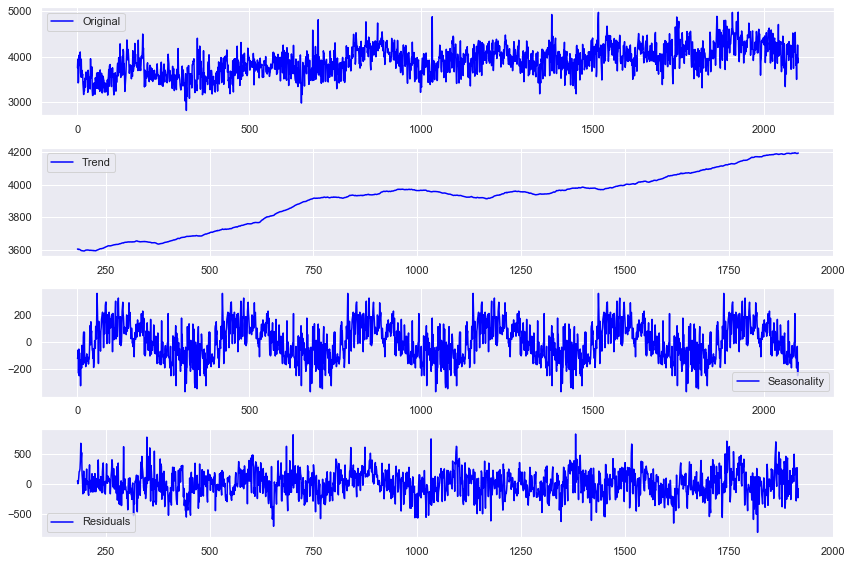

In [24]:
decomposition = seasonal_decompose(dfworking["CALLS_PER_DAY_NYC"], freq= 365)

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(dfworking["CALLS_PER_DAY_NYC"], label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

In [25]:
#With Stationary Trend

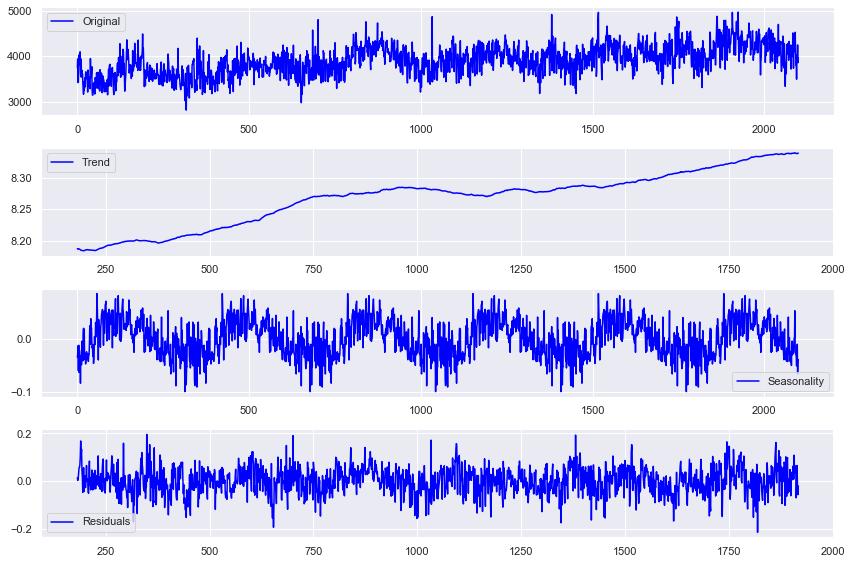

In [26]:
decomposition = seasonal_decompose(np.log(dfworking["CALLS_PER_DAY_NYC"]), freq= 365)

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(dfworking["CALLS_PER_DAY_NYC"], label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

# MODELING / PREDICTION

#### All NYC TOTAL CALLS

In [27]:
ts = dfworking.rename(columns={'INCIDENT_DATE': 'ds',
                        'CALLS_PER_DAY_NYC': 'y'})
ts=ts.drop('Unnamed: 0', axis= 1)

ts.head(5)

,ds,TEMP_MAX_F,TEMP_MIN_F,PRECIPITATION_INCHES,VISIBILITY_MILES,MAX_WIND_SPEED_MPH,WEEKDAY,SEASON,HOLIDAY,y
0,2013-01-02,34,24,0.0,10,18,2,1,False,3752.0
1,2013-01-04,38,34,0.0,10,20,4,1,False,3945.0
2,2013-01-05,43,34,0.0,10,18,5,1,False,3420.0
3,2013-01-06,46,35,0.0,10,16,6,1,False,3442.0
4,2013-01-07,45,38,0.0,10,16,0,1,False,4006.0


In [28]:
#splitting in order to test 1 week out. (Last 2 weeks of 2018 had inconsistent data.)
ts1= ts[:-31]
ts2=ts [-30:-23]

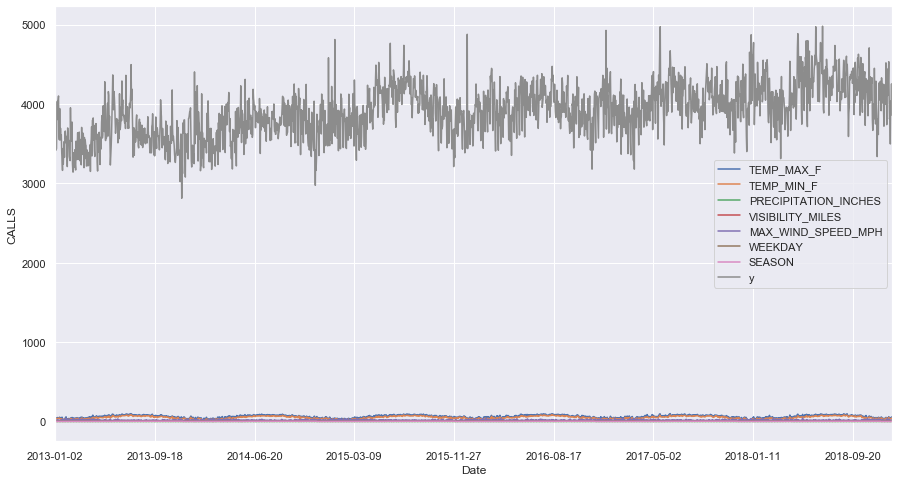

In [29]:
ax = ts.set_index('ds').plot(figsize=(15, 8))
ax.set_ylabel('CALLS')
ax.set_xlabel('Date')

plt.show()

In [30]:
test9 = proph(interval_width=0.95)

In [31]:
test9.add_regressor('TEMP_MAX_F')
test9.add_regressor('TEMP_MIN_F')
test9.add_regressor('PRECIPITATION_INCHES')
test9.add_regressor('MAX_WIND_SPEED_MPH')
test9.add_regressor('WEEKDAY')
test9.add_regressor('SEASON')
test9.add_regressor('HOLIDAY')

In [32]:
test9.fit(ts1)
forecast = test9.predict(ts2)
forecast.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,HOLIDAY,HOLIDAY_lower,HOLIDAY_upper,MAX_WIND_SPEED_MPH,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2,2018-12-03,4301.418584,4043.493425,4718.537790,4301.418584,4301.418584,0.0,0.0,0.0,-3.809678,...,39.590902,39.590902,39.590902,9.794794,9.794794,9.794794,0.0,0.0,0.0,4383.667541
3,2018-12-04,4301.941210,3799.523643,4445.029201,4301.925583,4301.941210,0.0,0.0,0.0,-9.908897,...,-38.092911,-38.092911,-38.092911,15.697522,15.697522,15.697522,0.0,0.0,0.0,4124.782455
4,2018-12-05,4302.463837,3757.607379,4420.625508,4302.401347,4302.463879,0.0,0.0,0.0,6.355687,...,-9.819804,-9.819804,-9.819804,21.876476,21.876476,21.876476,0.0,0.0,0.0,4088.329508
5,2018-12-06,4302.986463,3792.854185,4446.817023,4302.818644,4303.024771,0.0,0.0,0.0,-5.842751,...,29.332573,29.332573,29.332573,28.322446,28.322446,28.322446,0.0,0.0,0.0,4120.762993
6,2018-12-07,4303.509089,3879.758848,4546.686941,4303.234823,4303.589960,0.0,0.0,0.0,-5.842751,...,143.987179,143.987179,143.987179,35.028661,35.028661,35.028661,0.0,0.0,0.0,4219.617856


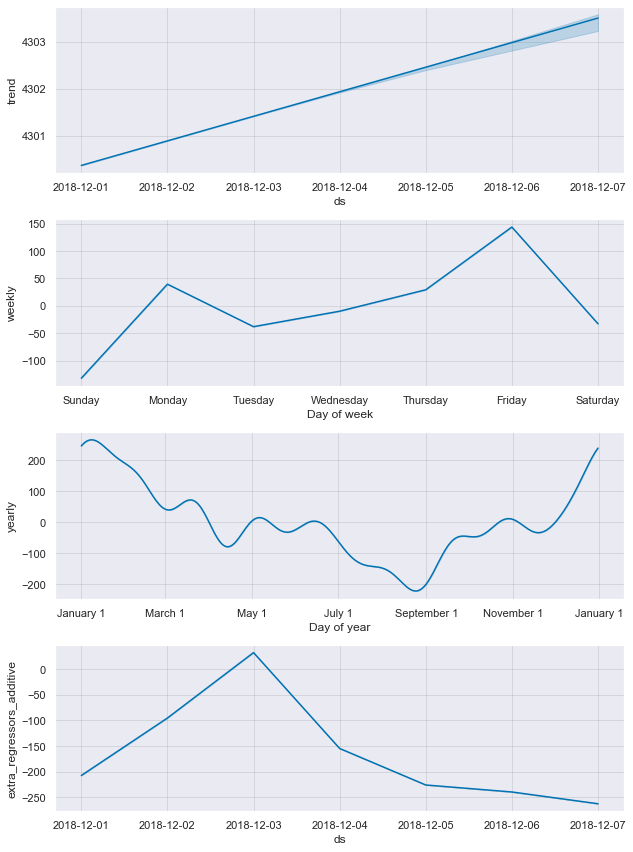

In [33]:
test9.plot_components(forecast)
plt.show()

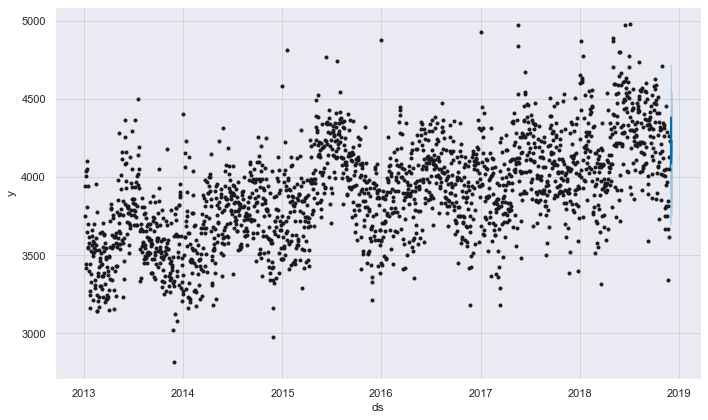

In [34]:
test9.plot(forecast, uncertainty=True)
plt.show()

In [35]:
rms = sqrt(mean_squared_error(ts2["y"], forecast["yhat"]))
rms

87.42819357845013

### Queens

In [36]:
QNS = QUEENS.rename(columns={'INCIDENT_DATE': 'ds',
                       'TOTAL_CALL': 'y'})
QNS.head(5)

,Unnamed: 0,ds,TEMP_MAX_F,TEMP_MIN_F,PRECIPITATION_INCHES,VISIBILITY_MILES,MAX_WIND_SPEED_MPH,WEEKDAY,SEASON,HOLIDAY,y
0,12,2013-01-02,34,24,0.0,10,18,2,1,False,709.0
1,26012,2013-01-04,38,34,0.0,10,20,4,1,False,735.0
2,29957,2013-01-05,43,34,0.0,10,18,5,1,False,640.0
3,3752,2013-01-06,46,35,0.0,10,16,6,1,False,662.0
4,33375,2013-01-07,45,38,0.0,10,16,0,1,False,794.0


In [37]:
QNSFIT= QNS[:-30]
QNSTEST= QNS [-29:-23]

Text(0.5, 0, 'Date')

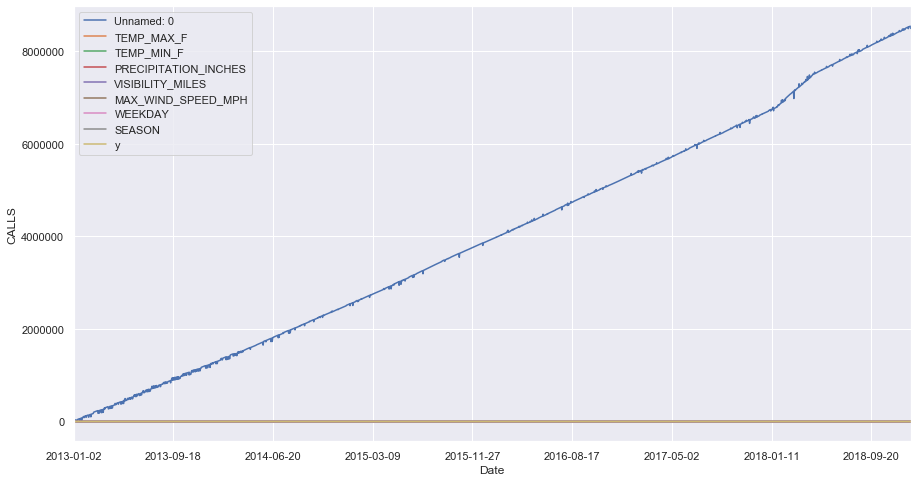

In [38]:
ax = QNS.set_index('ds').plot(figsize=(15, 8))
ax.set_ylabel('CALLS')
ax.set_xlabel('Date')

In [39]:
QNS1 = proph(interval_width=0.95)

QNS1.add_regressor('TEMP_MAX_F')
QNS1.add_regressor('TEMP_MIN_F')
QNS1.add_regressor('PRECIPITATION_INCHES')
# QNS1.add_regressor('VISIBILITY_MILES')
QNS1.add_regressor('MAX_WIND_SPEED_MPH')
QNS1.add_regressor('WEEKDAY')
QNS1.add_regressor('SEASON')
QNS1.add_regressor('HOLIDAY')
QNS1.fit(QNSFIT)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


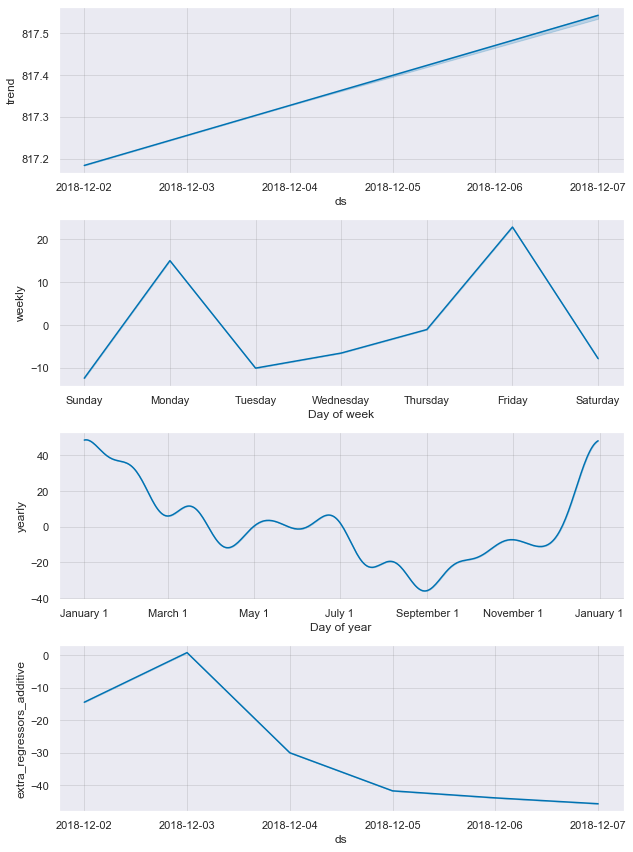

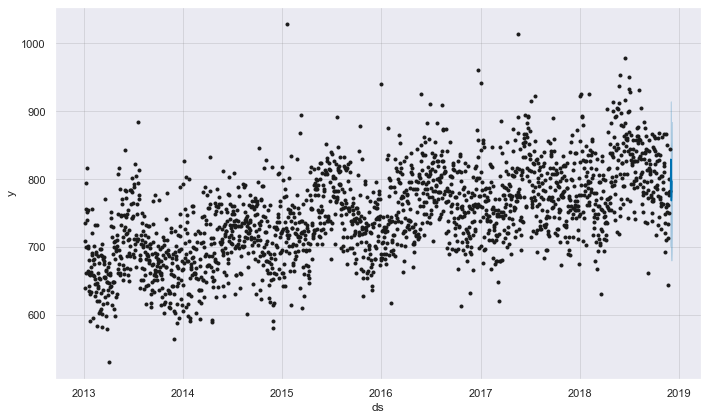

In [40]:
forecast1 = QNS1.predict(QNSTEST)
forecast1.tail()

plt.show()
QNS1.plot_components(forecast1)
plt.show()

QNS1.plot(forecast1, uncertainty=True)
plt.show()

In [41]:
rms = sqrt(mean_squared_error(QNSTEST["y"], forecast1["yhat"]))

In [42]:
rms

29.610920670554375

In [43]:
forecast1.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,HOLIDAY,HOLIDAY_lower,HOLIDAY_upper,MAX_WIND_SPEED_MPH,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-12-02,817.183728,701.098332,868.170716,817.183728,817.183728,0.0,0.0,0.0,0.727083,...,-12.419359,-12.419359,-12.419359,-5.090397,-5.090397,-5.090397,0.0,0.0,0.0,785.211286
1,2018-12-03,817.255554,746.895793,914.507775,817.255554,817.255554,0.0,0.0,0.0,-0.643335,...,15.039497,15.039497,15.039497,-3.858083,-3.858083,-3.858083,0.0,0.0,0.0,829.224864
2,2018-12-04,817.327379,698.162184,855.546710,817.327379,817.327379,0.0,0.0,0.0,-1.671148,...,-10.064129,-10.064129,-10.064129,-2.494282,-2.494282,-2.494282,0.0,0.0,0.0,774.772603
3,2018-12-05,817.399205,680.136647,851.616329,817.396007,817.399299,0.0,0.0,0.0,1.069687,...,-6.547196,-6.547196,-6.547196,-0.998957,-0.998957,-0.998957,0.0,0.0,0.0,768.149733
4,2018-12-06,817.471031,691.641485,849.181648,817.465616,817.472191,0.0,0.0,0.0,-0.985939,...,-1.055095,-1.055095,-1.055095,0.626337,0.626337,0.626337,0.0,0.0,0.0,773.179192


### Manhattan

In [44]:
MNHTN = MANHATTAN.rename(columns={'INCIDENT_DATE': 'ds',
                        'TOTAL_CALL': 'y'})
MNHTN.head(5)

,Unnamed: 0,ds,TEMP_MAX_F,TEMP_MIN_F,PRECIPITATION_INCHES,VISIBILITY_MILES,MAX_WIND_SPEED_MPH,WEEKDAY,SEASON,HOLIDAY,y
0,1,2013-01-02,34,24,0.0,10,18,2,1,False,864.0
1,26017,2013-01-04,38,34,0.0,10,20,4,1,False,920.0
2,29954,2013-01-05,43,34,0.0,10,18,5,1,False,734.0
3,3756,2013-01-06,46,35,0.0,10,16,6,1,False,779.0
4,33371,2013-01-07,45,38,0.0,10,16,0,1,False,912.0


In [45]:
manfit= MNHTN[:-30]
mantest= MNHTN [-29:-23]

Text(0.5, 0, 'Date')

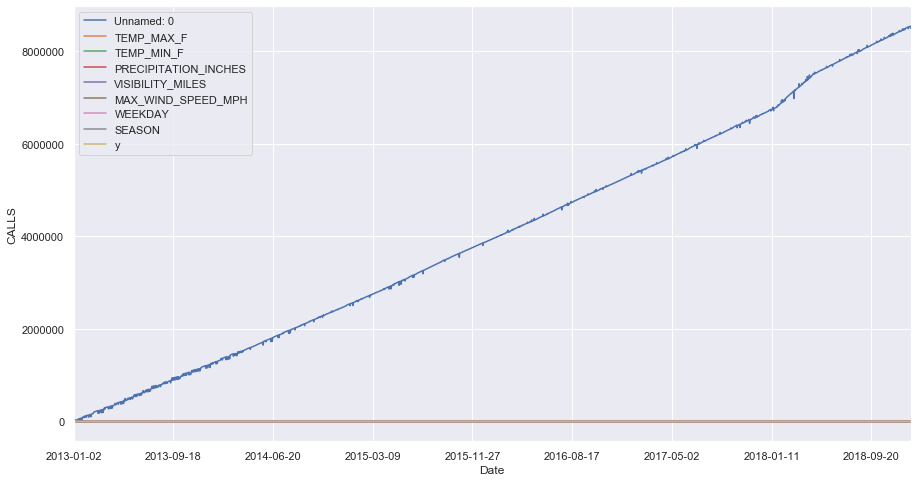

In [46]:
ax = MNHTN.set_index('ds').plot(figsize=(15, 8))
ax.set_ylabel('CALLS')
ax.set_xlabel('Date')

In [47]:
Man = proph(interval_width=0.95)

Man.add_regressor('TEMP_MAX_F')
Man.add_regressor('TEMP_MIN_F')
Man.add_regressor('PRECIPITATION_INCHES')
# QNS1.add_regressor('VISIBILITY_MILES')
Man.add_regressor('MAX_WIND_SPEED_MPH')
Man.add_regressor('WEEKDAY')
Man.add_regressor('SEASON')
Man.add_regressor('HOLIDAY')
Man.fit(manfit)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


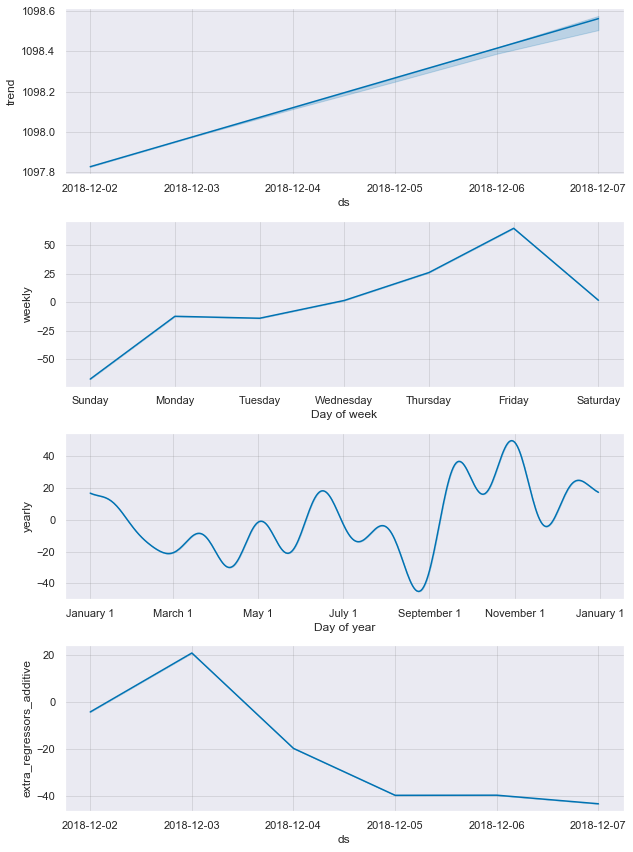

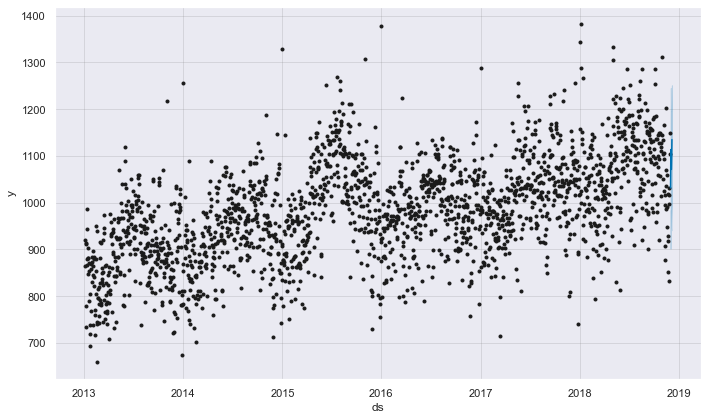

In [48]:
forecast2 = Man.predict(mantest)
forecast2.tail()

plt.show()
Man.plot_components(forecast2)
plt.show()

Man.plot(forecast2, uncertainty=True)
plt.show()

In [49]:

rms = sqrt(mean_squared_error(mantest["y"], forecast2["yhat"]))
rms

31.891850145164423

In [50]:
forecast2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,HOLIDAY,HOLIDAY_lower,HOLIDAY_upper,MAX_WIND_SPEED_MPH,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-12-02,1097.826691,901.423548,1157.964055,1097.826691,1097.826691,0.0,0.0,0.0,0.120622,...,-67.362374,-67.362374,-67.362374,5.170008,5.170008,5.170008,0.0,0.0,0.0,1031.265137
1,2018-12-03,1097.973857,983.943734,1245.250447,1097.973857,1097.973857,0.0,0.0,0.0,-0.106728,...,-12.386429,-12.386429,-12.386429,7.159759,7.159759,7.159759,0.0,0.0,0.0,1113.506209
2,2018-12-04,1098.121023,945.884643,1195.838797,1098.114046,1098.121023,0.0,0.0,0.0,-0.277241,...,-14.091003,-14.091003,-14.091003,9.188632,9.188632,9.188632,0.0,0.0,0.0,1073.308428
3,2018-12-05,1098.268189,940.461983,1196.942485,1098.249450,1098.268189,0.0,0.0,0.0,0.177459,...,1.494377,1.494377,1.494377,11.214181,11.214181,11.214181,0.0,0.0,0.0,1071.071991
4,2018-12-06,1098.415354,974.055714,1225.687379,1098.388111,1098.419265,0.0,0.0,0.0,-0.163566,...,25.967194,25.967194,25.967194,13.196322,13.196322,13.196322,0.0,0.0,0.0,1097.719805


### STATEN_ISLAND

In [51]:
STI = STATEN_ISLAND.rename(columns={'INCIDENT_DATE': 'ds',
                        'TOTAL_CALL': 'y'})
STI.head(5)

,Unnamed: 0,ds,TEMP_MAX_F,TEMP_MIN_F,PRECIPITATION_INCHES,VISIBILITY_MILES,MAX_WIND_SPEED_MPH,WEEKDAY,SEASON,HOLIDAY,y
0,5,2013-01-02,34,24,0.0,10,18,2,1,False,158.0
1,26026,2013-01-04,38,34,0.0,10,20,4,1,False,176.0
2,29967,2013-01-05,43,34,0.0,10,18,5,1,False,146.0
3,3760,2013-01-06,46,35,0.0,10,16,6,1,False,165.0
4,33390,2013-01-07,45,38,0.0,10,16,0,1,False,180.0


In [52]:
STIFIT= STI[:-30]
STITEST= STI [-29:-23]


Text(0.5, 0, 'Date')

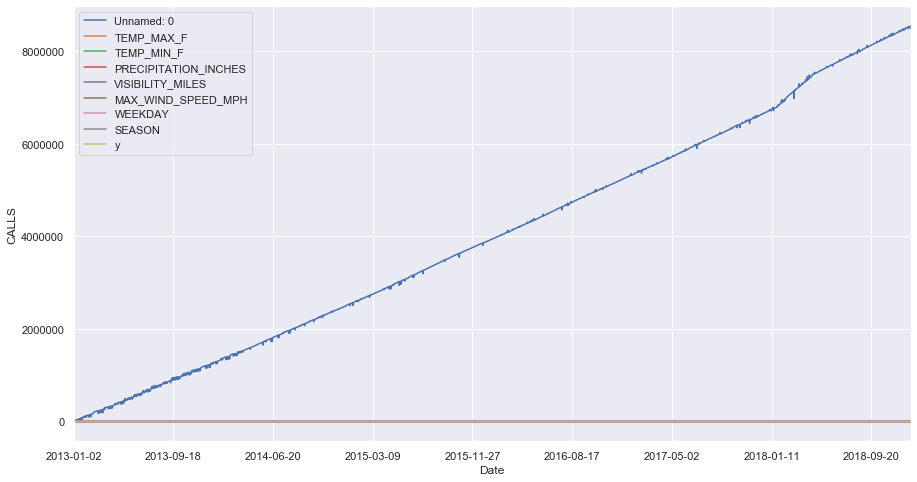

In [53]:
ax = STI.set_index('ds').plot(figsize=(15, 8))
ax.set_ylabel('CALLS')
ax.set_xlabel('Date')

In [54]:
STAT = proph(interval_width=0.95)

STAT.add_regressor('TEMP_MAX_F')
STAT.add_regressor('TEMP_MIN_F')
STAT.add_regressor('PRECIPITATION_INCHES')
# QNS1.add_regressor('VISIBILITY_MILES')
STAT.add_regressor('MAX_WIND_SPEED_MPH')
STAT.add_regressor('WEEKDAY')
STAT.add_regressor('SEASON')
STAT.add_regressor('HOLIDAY')
STAT.fit(STIFIT)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


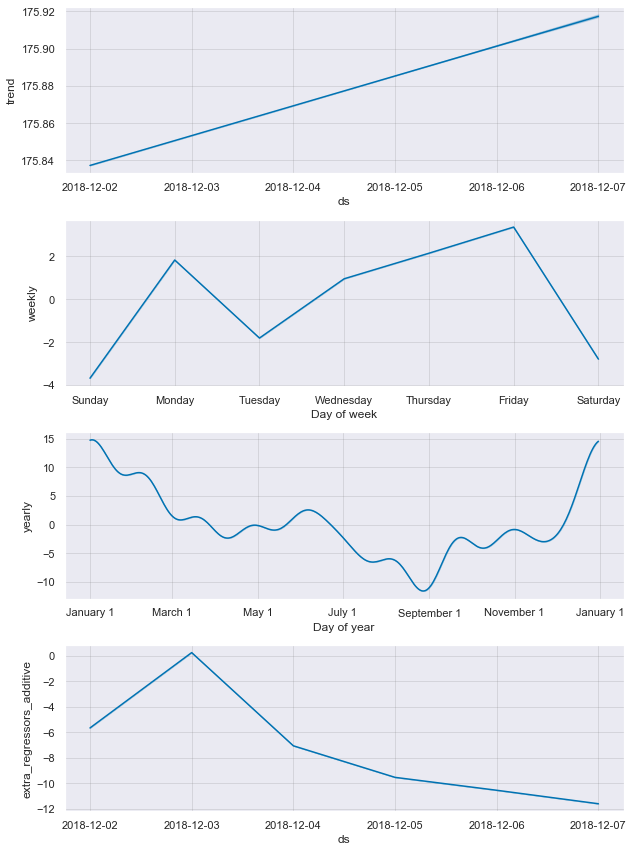

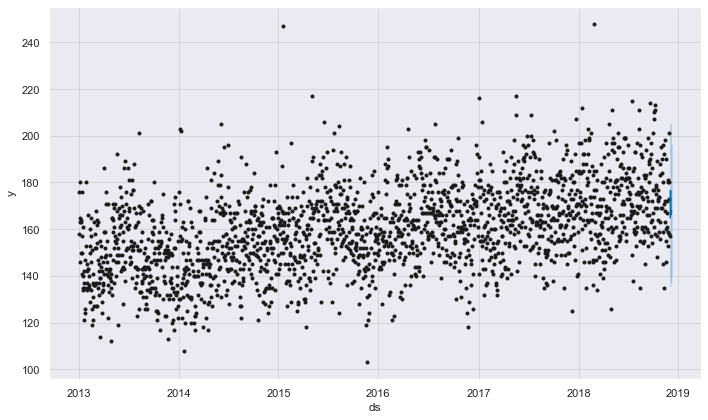

In [55]:
forecast3 = STAT.predict(STITEST)
forecast3.tail()

plt.show()
STAT.plot_components(forecast3)
plt.show()

STAT.plot(forecast3, uncertainty=True)
plt.show()

In [56]:

rms = sqrt(mean_squared_error(STITEST["y"], forecast3["yhat"]))
rms

14.05715567516861

In [57]:
forecast3.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,HOLIDAY,HOLIDAY_lower,HOLIDAY_upper,MAX_WIND_SPEED_MPH,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-12-02,175.837319,135.549791,195.609953,175.837319,175.837319,0.0,0.0,0.0,0.242953,...,-3.681895,-3.681895,-3.681895,-1.620581,-1.620581,-1.620581,0.0,0.0,0.0,164.873077
1,2018-12-03,175.853326,147.310087,205.318122,175.853326,175.853326,0.0,0.0,0.0,-0.214969,...,1.826568,1.826568,1.826568,-1.306788,-1.306788,-1.306788,0.0,0.0,0.0,176.606554
2,2018-12-04,175.869334,137.622855,193.651301,175.869334,175.869334,0.0,0.0,0.0,-0.558411,...,-1.810446,-1.810446,-1.810446,-0.957181,-0.957181,-0.957181,0.0,0.0,0.0,166.042471
3,2018-12-05,175.885341,137.273853,194.731291,175.885341,175.885541,0.0,0.0,0.0,0.357434,...,0.952221,0.952221,0.952221,-0.571197,-0.571197,-0.571197,0.0,0.0,0.0,166.738317
4,2018-12-06,175.901348,138.401230,196.349200,175.901348,175.902030,0.0,0.0,0.0,-0.329450,...,2.142248,2.142248,2.142248,-0.148506,-0.148506,-0.148506,0.0,0.0,0.0,167.356974


### BRONX

In [58]:
BRN = BRONX.rename(columns={'INCIDENT_DATE': 'ds',
                        'TOTAL_CALL': 'y'})
BRN.head(5)

,Unnamed: 0,ds,TEMP_MAX_F,TEMP_MIN_F,PRECIPITATION_INCHES,VISIBILITY_MILES,MAX_WIND_SPEED_MPH,WEEKDAY,SEASON,HOLIDAY,y
0,0,2013-01-02,34,24,0.0,10,18,2,1,False,885.0
1,26006,2013-01-04,38,34,0.0,10,20,4,1,False,975.0
2,29952,2013-01-05,43,34,0.0,10,18,5,1,False,841.0
3,3754,2013-01-06,46,35,0.0,10,16,6,1,False,849.0
4,33399,2013-01-07,45,38,0.0,10,16,0,1,False,950.0


In [59]:
BRNFIT= BRN[:-30]
BRNTEST= BRN [-29:-23]

Text(0.5, 0, 'Date')

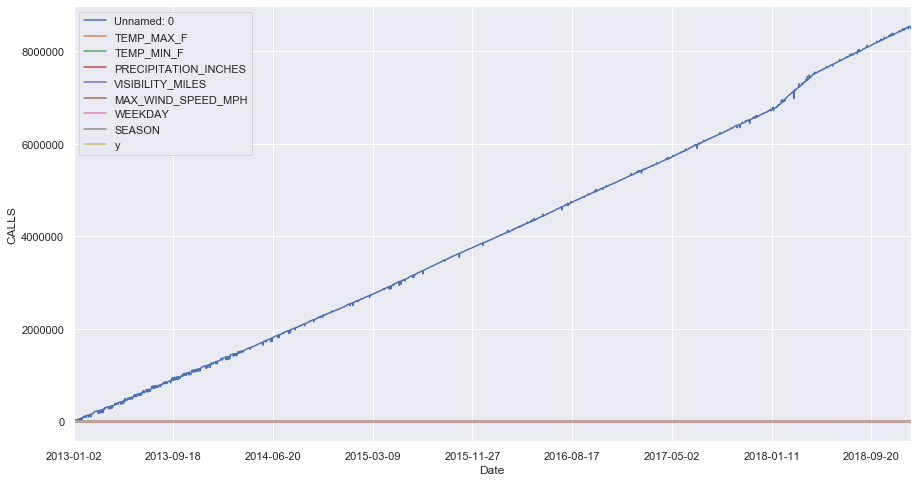

In [60]:
ax = BRN.set_index('ds').plot(figsize=(15, 8))
ax.set_ylabel('CALLS')
ax.set_xlabel('Date')

In [61]:
BRX = proph(interval_width=0.95)

BRX.add_regressor('TEMP_MAX_F')
BRX.add_regressor('TEMP_MIN_F')
BRX.add_regressor('PRECIPITATION_INCHES')
# QNS1.add_regressor('VISIBILITY_MILES')
BRX.add_regressor('MAX_WIND_SPEED_MPH')
BRX.add_regressor('WEEKDAY')
BRX.add_regressor('SEASON')
BRX.add_regressor('HOLIDAY')
BRX.fit(BRNFIT)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


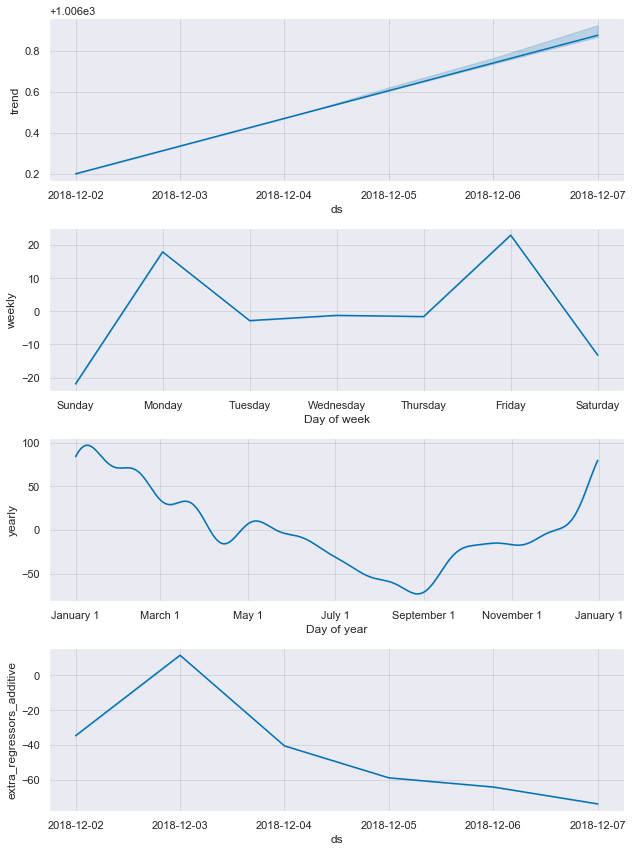

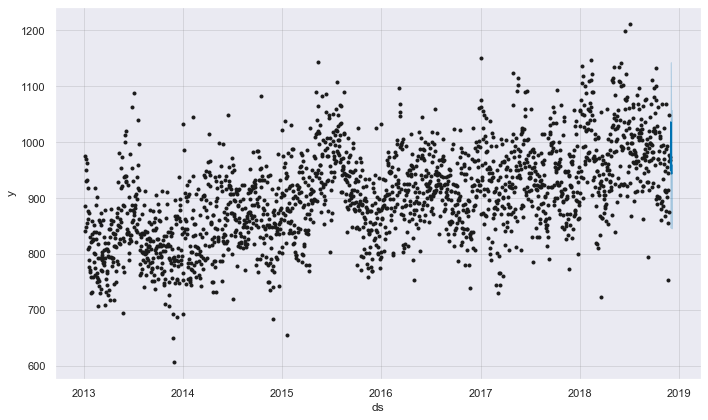

In [62]:
forecast4 = BRX.predict(BRNTEST)
forecast4.tail()

plt.show()
BRX.plot_components(forecast4)
plt.show()

BRX.plot(forecast4, uncertainty=True)
plt.show()

In [63]:

rms = sqrt(mean_squared_error(BRNTEST["y"], forecast4["yhat"]))
rms

47.96686329897752

In [64]:
forecast4.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,HOLIDAY,HOLIDAY_lower,HOLIDAY_upper,MAX_WIND_SPEED_MPH,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-12-02,1006.198978,847.109918,1049.566129,1006.198978,1006.198978,0.0,0.0,0.0,1.317543,...,-21.907289,-21.907289,-21.907289,-0.152693,-0.152693,-0.152693,0.0,0.0,0.0,949.492811
1,2018-12-03,1006.334551,945.201708,1142.984448,1006.334551,1006.334551,0.0,0.0,0.0,-1.165784,...,17.911126,17.911126,17.911126,0.371632,0.371632,0.371632,0.0,0.0,0.0,1036.121183
2,2018-12-04,1006.470124,869.356069,1059.048755,1006.470124,1006.470124,0.0,0.0,0.0,-3.028280,...,-2.836186,-2.836186,-2.836186,0.923783,0.923783,0.923783,0.0,0.0,0.0,964.071297
3,2018-12-05,1006.605698,846.283536,1043.579083,1006.605698,1006.621943,0.0,0.0,0.0,1.938375,...,-1.257078,-1.257078,-1.257078,1.527986,1.527986,1.527986,0.0,0.0,0.0,948.052163
4,2018-12-06,1006.741271,845.604325,1039.170130,1006.737412,1006.765576,0.0,0.0,0.0,-1.786616,...,-1.612707,-1.612707,-1.612707,2.210244,2.210244,2.210244,0.0,0.0,0.0,943.246005


### BROOKLYN

In [65]:
B = BROOKLYN.rename(columns={'INCIDENT_DATE': 'ds',
                        'TOTAL_CALL': 'y'})
B.head(5)

,Unnamed: 0,ds,TEMP_MAX_F,TEMP_MIN_F,PRECIPITATION_INCHES,VISIBILITY_MILES,MAX_WIND_SPEED_MPH,WEEKDAY,SEASON,HOLIDAY,y
0,4,2013-01-02,34,24,0.0,10,18,2,1,False,1136.0
1,26008,2013-01-04,38,34,0.0,10,20,4,1,False,1138.0
2,29951,2013-01-05,43,34,0.0,10,18,5,1,False,1059.0
3,3761,2013-01-06,46,35,0.0,10,16,6,1,False,987.0
4,33372,2013-01-07,45,38,0.0,10,16,0,1,False,1170.0


In [66]:
BFIT= B[:-30]
BTEST= B [-29:-24]

Text(0.5, 0, 'Date')

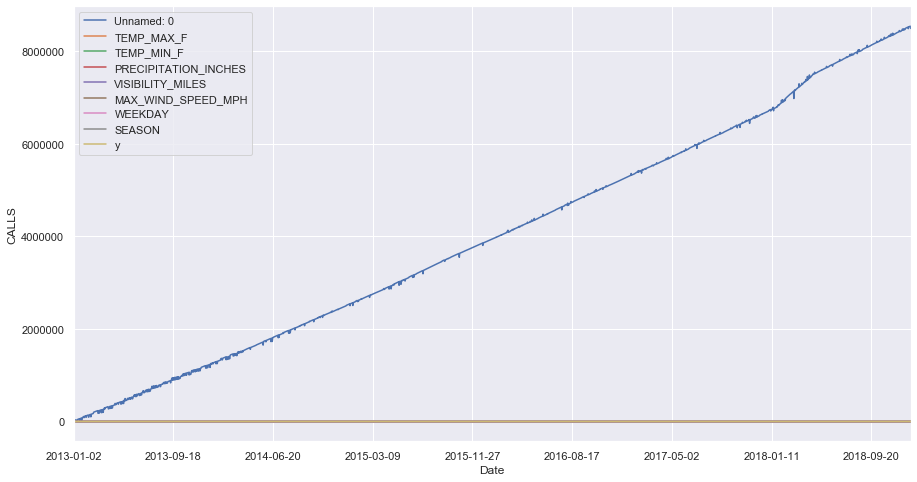

In [67]:
ax = B.set_index('ds').plot(figsize=(15, 8))
ax.set_ylabel('CALLS')
ax.set_xlabel('Date')

In [68]:
BR = proph(interval_width=0.95)

BR.add_regressor('TEMP_MAX_F')
BR.add_regressor('TEMP_MIN_F')
BR.add_regressor('PRECIPITATION_INCHES')
# QNS1.add_regressor('VISIBILITY_MILES')
BR.add_regressor('MAX_WIND_SPEED_MPH')
BR.add_regressor('WEEKDAY')
BR.add_regressor('SEASON')
BR.add_regressor('HOLIDAY')
BR.fit(BFIT)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


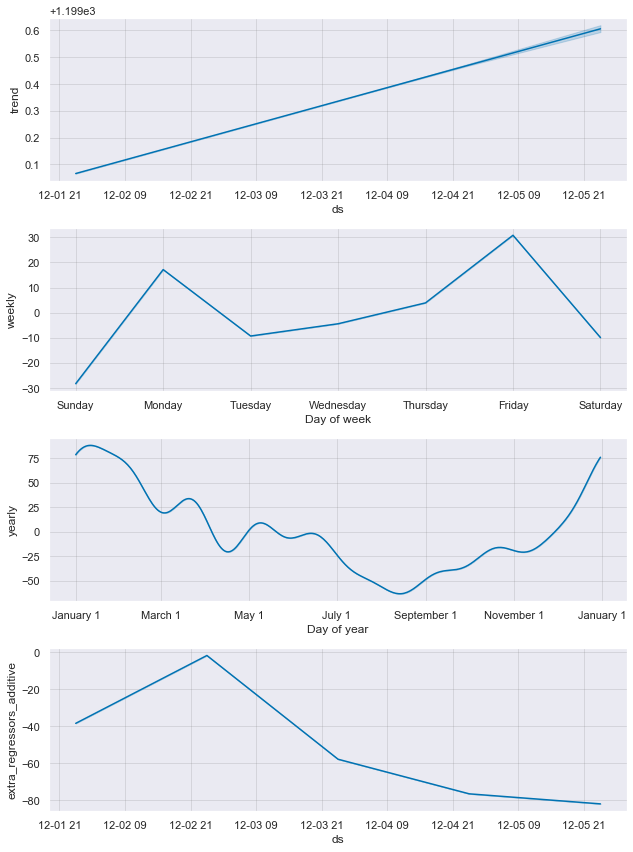

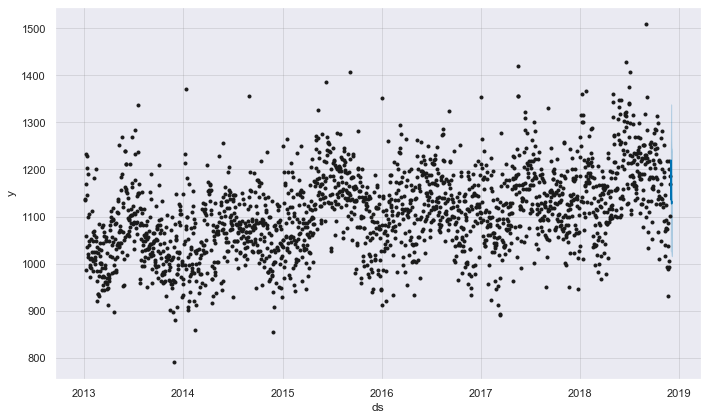

In [69]:
forecast5 = BR.predict(BTEST)
forecast5.tail()

plt.show()
BR.plot_components(forecast5)
plt.show()

BR.plot(forecast5, uncertainty=True)
plt.show()

In [70]:

rms = sqrt(mean_squared_error(BTEST["y"], forecast5["yhat"]))
rms

22.48710775660162